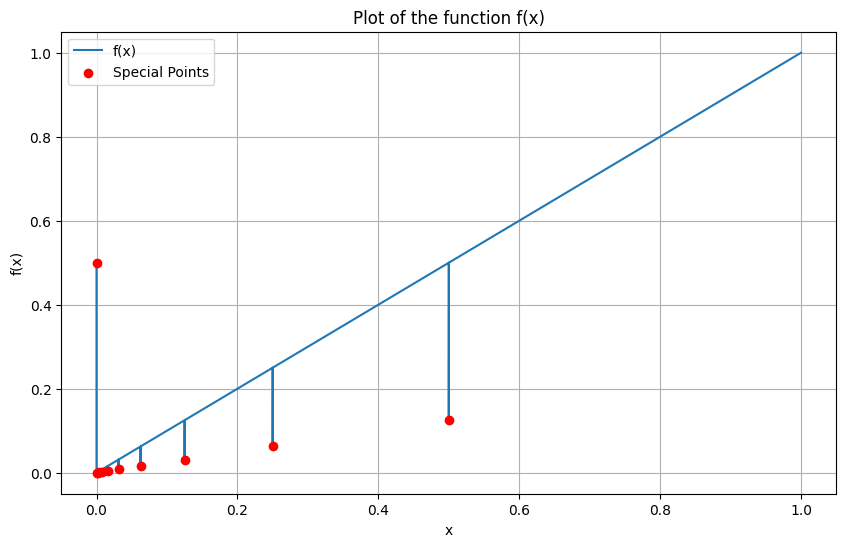

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    if x == 0:
        return 1 / 2
    k = np.log2(1 / x)
    if k.is_integer() and k > 0:
        return 1 / (2 ** (int(k) + 2))
    return x

# Generate x values
x_values = np.linspace(0, 1, 100000)
y_values = [f(x) for x in x_values]

# Add specific points to ensure they are plotted correctly
special_points_x = [1 / 2**k for k in range(1, 11)]
special_points_y = [1 / 2**(k + 2) for k in range(1, 11)]
x_values = np.concatenate((x_values, special_points_x))
y_values = np.concatenate((y_values, special_points_y))

# Sort values for better plotting
sorted_indices = np.argsort(x_values)
x_values = np.array(x_values)[sorted_indices]
y_values = np.array(y_values)[sorted_indices]

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(special_points_x, special_points_y, color='red', zorder=5, label='Special Points')
plt.scatter([0], [1/2], color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.special import binom

# Parameters
n = 4
p = 1/4
state_space = np.arange(n+1)

# Binomial probabilities
pi = np.array([binom(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in state_space])

# Proposal matrix T
T = np.zeros((n+1, n+1))
T[0, 1] = 1
T[1, 0] = T[1, 2] = 1/2
T[2, 1] = T[2, 3] = 1/2
T[3, 2] = T[3, 4] = 1/2
T[4, 3] = 1

# Acceptance probability matrix
alpha = np.zeros((n+1, n+1))
for x in state_space:
    for y in state_space:
        if T[x, y] > 0:
            alpha[x, y] = min(1, (pi[y] * T[y, x]) / (pi[x] * T[x, y]))

# Transition matrix P
P = np.zeros((n+1, n+1))
for x in state_space:
    for y in state_space:
        if x != y:
            P[x, y] = T[x, y] * alpha[x, y]
    P[x, x] = 1 - sum(P[x, state_space != x])

P


array([[0.33333333, 0.66666667, 0.        , 0.        , 0.        ],
       [0.5       , 0.25      , 0.25      , 0.        , 0.        ],
       [0.        , 0.5       , 0.38888889, 0.11111111, 0.        ],
       [0.        , 0.        , 0.5       , 0.41666667, 0.08333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

In [ ]:
alpha

array([[0.        , 0.66666667, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.22222222, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.16666667],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

In [ ]:
T

array([[0. , 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. , 0. ]])

In [ ]:
import numpy as np
from scipy.stats import poisson
# Updated parameters for t = 12
lambda_t = 1000 * 0.24 * 12  # lambda = 4800 for t = 12

# Calculate P(T_t >= 1000) for t = 12
prob_t12 = 1 - poisson.cdf(3999, lambda_t)

prob_t12

0.0